In [1]:
import pickle
import re

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

print(list(demo.keys()))

['f_22001_0_0', 'f_21003_3_0', 'f_21003_2_0', 'f_21000_0_0', 'CaAfCarDiff', 'CaIndDiff', 'CaChiDiff', 'f_21000_0_0_comb', 'longitudinal', '22438-0.0', '22828-0.0', '26201-0.0', '26202-0.0', '26203-0.0', '26204-0.0', '26205-0.0', '26206-0.0', '26207-0.0', '26208-0.0', '26209-0.0', '26210-0.0', '26211-0.0', '26212-0.0', '26213-0.0', '26214-0.0', '26215-0.0', '26216-0.0', '26217-0.0', '26218-0.0', '26219-0.0', '26220-0.0', '26221-0.0', '26222-0.0', '26223-0.0', '26224-0.0', '26225-0.0', '26226-0.0', '26227-0.0', '26228-0.0', '26229-0.0', '26231-0.0', '26232-0.0', '26233-0.0', '26234-0.0', '26235-0.0', '26236-0.0', '26237-0.0', '26238-0.0', '26239-0.0', '26240-0.0', '26241-0.0', '26242-0.0', '26243-0.0', '26244-0.0', '26245-0.0', '26246-0.0', '26247-0.0', '26248-0.0', '26249-0.0', '26250-0.0', '26251-0.0', '26252-0.0', '26253-0.0', '26254-0.0', '26255-0.0', '26256-0.0', '26257-0.0', '26258-0.0', '26259-0.0', '26260-0.0', '26261-0.0', '26262-0.0', '26263-0.0', '26264-0.0', '26265-0.0', '262

In [7]:
import pickle

field = 25753

basedir = '/run/media/anton/AntonData1/UKB_MRI_data_11092022/'

fc2 = pickle.load(open(f'{basedir}/{field}_2.pkl', 'rb'))
fc3 = pickle.load(open(f'{basedir}/{field}_3.pkl', 'rb'))

print(len(fc2), len(fc3))

40471 2896


In [9]:
count = 0

diffog = []

for sub in fc3:
    if sub in fc2:
        diffog.append(fc3[sub]-fc2[sub])

diffog = np.stack(diffog)

print(diffog.shape)

(2752, 1485)


In [2]:
import numpy as np

first = []
second = []

for sub in demo['f_21003_3_0']:
    if sub not in demo['f_21003_2_0']:
        continue
    try:
        p0 = np.load(f'{demodir}/fc/{sub}_task-20227-2_fc.npy')
        p1 = np.load(f'{demodir}/fc/{sub}_task-20227-3_fc.npy')
#         p0 = fc2[sub]
#         p1 = fc3[sub]
        first.append(p0)
        second.append(p1)
    except:
        continue
    
first = np.stack(first)
second = np.stack(second)

print(len(first), len(second))

2722 2722


In [3]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


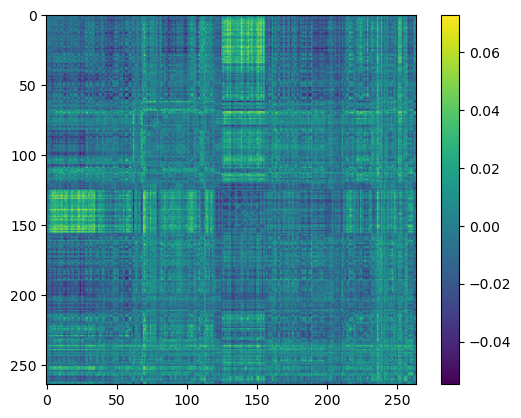

In [5]:
import matplotlib.pyplot as plt

diff = second-first
diff = np.mean(diff, axis=0)

plt.imshow(remap(vec2mat(diff)))
plt.colorbar()
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

N = 400

errs = []
nullerrs = []

for _ in range(10):
    idcs = np.random.permutation(len(first))

    a = first-second
    b = second-first

    x = np.concatenate([a[idcs[:N]], b[idcs[N:N*2]]])
    y = np.concatenate([np.zeros(N), np.ones(N)])

    xtr, xt, ytr, yt = train_test_split(x, y, stratify=y, train_size=0.5)

    reg = LogisticRegression(max_iter=1000).fit(xtr, ytr)
    yhat = reg.predict(xt)
    err = np.mean(yhat == yt)
    nullerr = np.mean(yt)
    if nullerr < 0.5:
        nullerr = 1-nullerr
    print(err)
    print(nullerr)
    errs.append(err)
    nullerrs.append(nullerr)
    
print(np.mean(errs), np.std(errs))
print(np.mean(nullerrs), np.std(nullerrs))

0.7025
0.5
0.73
0.5
0.7575
0.5
0.7625
0.5
0.7425
0.5
0.7325
0.5
0.77
0.5
0.7725
0.5
0.76
0.5
0.7275
0.5
0.74575 0.021361472327533968
0.5 0.0
